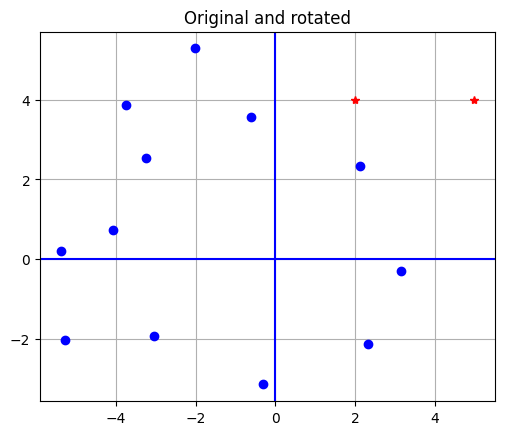

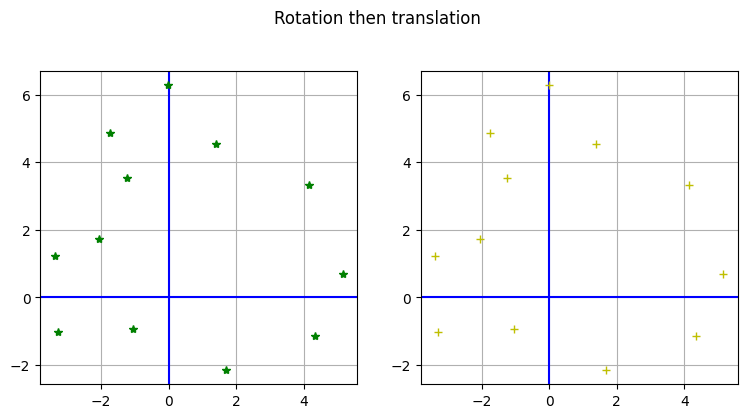

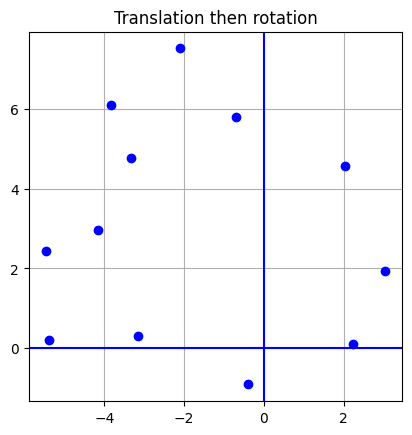

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


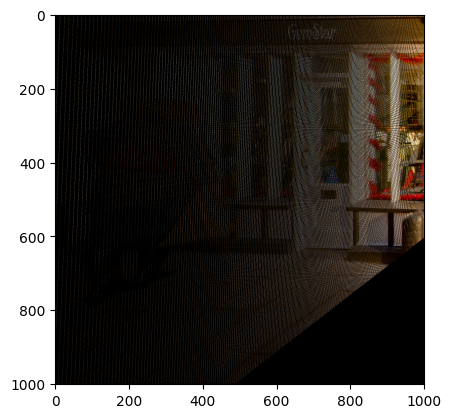

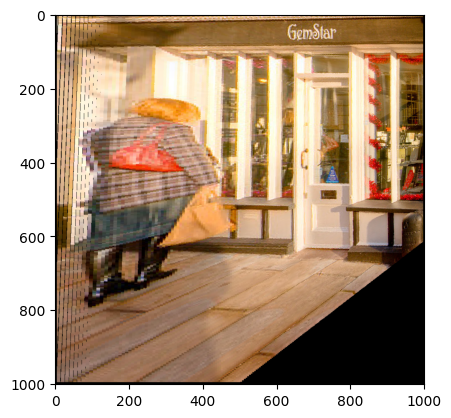

In [1]:
#import needed libraries
import numpy as np
import matplotlib.pyplot as plt
import math
from skimage.io import imread
from skimage.color import rgb2gray

# define your points 
points = np.array([[2,5],[4,4],[3,2],[3,-1],[1,-3],[-1,-3],[-3,-1],[-3,2],[-4,4],[-2,5],[-1,4],[1,4]])

# represent your points in homogeneous coordinates (3 coordinates).
new_points = np.array([[2,5,1],[4,4,1],[3,2,1],[3,-1,1],[1,-3,1],[-1,-3,1],[-3,-1,1],[-3,2,1],[-4,4,1],[-2,5,1],[-1,4,1],[1,4,1]])

# make the points be in columns (you need to transpose them)
transpose_points = new_points.transpose()#Reference:https://www.digitalocean.com/community/tutorials/numpy-matrix-transpose-array

# define your rotation matrix here:
R= np.array([[math.cos(20), -math.sin(20), 0],[math.sin(20), math.cos(20), 0],[0,0,1]])

# set up your plot
fig, ax = plt.subplots(1)
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')   #draw x axis
ax.axvline(0, color='blue')   #draw y axis

# Plot original points to see everything looks correct
ax.plot(points[0,:],points[1,:],'r*')

# do the rotation
# you can use np.matmul
rotPoints = np.matmul(R, transpose_points)

plt.plot(rotPoints[0,:],rotPoints[1,:],'bo') 
plt.title('Original and rotated')
plt.show()

# define your translation matrix here:
T= np.array([[1, 0, 2],[0, 1, 1],[0,0,1]])

# translation + rotation
fig, ax = plt.subplots(ncols=2, figsize=(9, 4.5))
fig.suptitle('Rotation then translation')
#subplot 1
ax[0].clear()
ax[0].grid(True)
ax[0].axhline(0, color='blue')
ax[0].axvline(0, color='blue')
ax[0].set_aspect('equal')

#subplot 2
ax[1].clear()
ax[1].grid(True)
ax[1].axhline(0, color='blue')
ax[1].axvline(0, color='blue')
ax[1].set_aspect('equal')

# Compute translation over your rotated points
#np.matmul
tRotPoints = np.matmul(T, rotPoints)

ax[0].plot(tRotPoints[0,:],tRotPoints[1,:],'g*')

# Compute a single matrix for your rotation and translation
tR = np.matmul(T, R)
tRotPoints2 = np.matmul(tR, transpose_points)

# Transform your points with a single matrix
#plot points
ax[1].plot(tRotPoints2[0,:],tRotPoints2[1,:],'y+')
plt.show()
#We see that we get a shape exactly the same as the coordinate points of the figure in b 
#(Picture 2 and Picture 3 side by side)

#Also compute rotation followed by translation, and plot, and comment (d and e)
# translation + rotation
fig, ax = plt.subplots(1)
ax.clear()
ax.grid(True)
ax.set_aspect('equal')
ax.axhline(0, color='blue')   
ax.axvline(0, color='blue')

rT = np.matmul(R, T) #single matrix for our translation and rotation
rTotPoints = np.matmul(rT, transpose_points)

ax.plot(rTotPoints[0,:],rTotPoints[1,:],'bo')
plt.title('Translation then rotation')
plt.show()

#The resulting matrices are not the same because we can tell by looking at the images. If the matrices were the same, the 
#resulting images would have to be exactly the same. The reason why the result is not the same matrices does not have 
#commutative property on multiplication. We could reach the same result if one of the matrices was the identity matrix .

#------------------------------------------------------------------------------------------------------------------------#

# load an image to warp
img = imread("https://raw.githubusercontent.com/cvrg-iyte/cvrg-iyte.github.io/master/assets/img/img2warp.jpg")

# the values that can take y
i = np.linspace(0, img.shape[0]-1, img.shape[0]).astype(int)
# the values that can take x
j = np.linspace(0, img.shape[1]-1, img.shape[1]).astype(int)
# combination of values that can take x, and y in a grid
yv, xv = np.meshgrid(i, j)

# number of points on the grid
numpoints = xv.ravel().shape[0]
# Note: ravel() returns contiguous flattened array (1D array with all the 
# input-array elements and with the same type as it). 

# extract the color channels
r = img[yv.ravel(),xv.ravel(),0]
g = img[yv.ravel(),xv.ravel(),1]
b = img[yv.ravel(),xv.ravel(),2]
# Define Homography matrix 
H=np.array([[-2.90978069e+00,  3.54859237e-02,  1.70029144e+03],
            [-6.48857919e-01, -8.36844934e-01,  6.24249500e+02],
            [-2.10617311e-03,  8.27414761e-06,  1.00000000e+00]]
)

# all the values of x coordinates as a row
x_cord = xv.ravel().reshape((1,numpoints))
# all the values of y coordinates as a row
y_cord = yv.ravel().reshape((1,numpoints))

# define the homogeneous coordinates
grid = np.concatenate((x_cord, y_cord, np.ones((1,numpoints))),axis=0)

# transform the grid (your canvas) in the new coordinated determined by the homography defined below
newgrid = np.matmul(H, grid)

# Convert from homogeneous to heterogeneous coordinates
# TO DO: complete the conversion. remember x=X/w
newgridHetero = np.zeros((3,len(newgrid[0]))) #I created the matrix to avoid the error
newgridHetero[0,:] = newgrid[0]/newgrid[2]
newgridHetero[1,:] = newgrid[1]/newgrid[2]

# Raw approximation. You can round your newgridHetero values to closest integer 
newgrid2 = np.round(newgridHetero)

# define your new empty canvas (it will have -1 if is not defined)
warped = -np.ones((1001,1001,3)).astype(np.int16)

# only consider points that are in your area of interest (0 to 1000)
validsX=np.bitwise_and(newgrid2[0,:]>=0,newgrid2[0,:]<1000)
validsY=np.bitwise_and(newgrid2[1,:]>=0,newgrid2[1,:]<1000)
valids = np.bitwise_and(validsX,validsY)

# assign color to the pixels that are valids
#warped[newgrid2[1,valids],newgrid2[0,valids],0]= r[valids]
#I was getting the IndexError: arrays used as indices must be of integer (or boolean) type error when I ran this part, so I 
#tried to convert this line to the code below

# TO DO: ASSIGN the remaining colors
count = 0
for i,j in zip(newgrid2[1,valids], newgrid2[0,valids]):
    warped[int(i),int(j),0]= r[valids][count]
    warped[int(i),int(j),1]= g[valids][count]
    warped[int(i),int(j),2]= b[valids][count]
    count += 1
    
plt.imshow(warped)
plt.show()

#Our warped image is the door with the red ornaments on the right in the original image. There are gaps in our image.
#First, there is a clear triangle-shaped gap in the lower right diagonal of our warped image. (This part is not visible in the 
#original picture.) Secondly, we see progressively increasing gaps, starting with the human in our warped image. We can see or 
#perceive the human even if the gaps are dense at that point (yellow sachet or bag can be reference for us). We can clearly say 
#that there is a gap in the parts on the left side of the human (There are gaps both on the left side and slightly behind of the
#person).

# Nearest Neighbor interpolation
#(code below is not forward or backward mapping, we just make the pixels in 'warped' cover a larger area)

# You dont need to change anything in the code below

# your new canvas
warped2 = np.zeros((1001,1001,3)).astype(np.uint8)
# Area where we look for closest valid assignation
area2check=5

# loop over the valid area of the warped image
for i in range(area2check,warped.shape[0]-area2check):
    for j in range(area2check,warped.shape[1]-area2check):
        # check if the pixel has a valid warped value        
        if warped[i,j,0]==-1:  #need to look for neighbor
            distance = area2check*area2check+1  # assign a distance larger than any that can be found in the area to check
            
            # loop over all the possible neighbors
            for k in range(i-area2check,i+area2check):
                for l in range(j-area2check,j+area2check):
                    distancetested = (abs(k-i)+abs(l-j))  # L1 distance
                    if warped[k,l,0]>=0 and distancetested<distance:    # found a warped point , and it is closest
                        distance=distancetested
                        warped2[i,j]=warped[k,l]
        else:  #assign the valid warping
            warped2[i,j] =warped[i,j]
            
        
plt.imshow(warped2)
plt.show()

#The common feature of the two pictures is that they both have a gap in the form of a triangle in the lower right (we can say 
#that the interpolated image is slightly smaller). There is no gap in the interpolated image picture, except for the small line 
#spaces on the left. In short, we can say that the interpolated image is a much less gapped and much clearer image than the 
#initially warped image.